# An Exploratory Analysis of New York City Airbnb Data

TODO - This data science project will examine, analyze and draw conclusions from a NYC Airbnb dataset taken from Kaggle. The data contains variables such as airbnb location, host id, date of last reivew, and cost per night. The analysis of this project will primarily be executed using Pandas, Matplotlib and Seaborn. This project is my final assignment submission for the online course 'Data Analysis with Python: Zero to Pandas' which can be found at zerotopandas.com. Thank you for taking the time to review my work and analysis. 

## Downloading the Dataset

**TODO** - Download and read-in the NYC Airbnb data. 

First let's make sure we have loaded all of our libraries that will be using for this project. These include Numpy, Pandas, Seaborn and Matplotlib. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Let's now load in our dataset. This dataset was downloaded from Kaggle. The Kaggle dataset name is "New York City Airbnb Open Data". It was retrieved from this link: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv
I have uploaded it to this Jupyter notebook and will now read in the csv file.

In [2]:
pip install opendatasets --upgrade

     |████████████████████████████████| 58 kB 4.9 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 10.2 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=8ebbe29743ab38767bf95e6e284d061dd107a84049db6afec345198dfc3ea820
  Stored in directory: /home/jovyan/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv'
od.download('https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: seamusgallivan
Your Kaggle Key: ········


100%|██████████| 2.44M/2.44M [00:00<00:00, 40.5MB/s]

In [6]:
data_dir = './new-york-city-airbnb-open-data'

In [7]:
import os
os.listdir(data_dir)

['AB_NYC_2019.csv', 'New_York_City_.png']

In [8]:
df = pd.read_csv('./new-york-city-airbnb-open-data/AB_NYC_2019.csv')

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "airbnb-course-project" # change this (use lowercase letters and hyphens only)

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sgallivan19/airbnb-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sgallivan19/airbnb-course-project


'https://jovian.ai/sgallivan19/airbnb-course-project'

## Data Preparation and Cleaning

**TODO** - I will now do some trivial data preparation and cleaning to make further analysis of the data go as smoothly as possible.



In [13]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [14]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

It looks like all 5 boroughs of New York City are represented. 

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Let's remove all values with a price of zero.

In [16]:
df = df.loc[df['price'] > 0]
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Lastly, let's convert the 'last_review' column to datetime using Pandas. 

In [17]:
df['last_review'] = pd.to_datetime(df.last_review)

/tmp/ipykernel_60/2815508268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df.last_review)


In [18]:
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48884, dtype: datetime64[ns]

In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sgallivan19/airbnb-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sgallivan19/airbnb-course-project


'https://jovian.ai/sgallivan19/airbnb-course-project'

## Exploratory Analysis and Visualization

**TODO** - Now on to some exploratory analysis with the NY airbnb data. Let's try to find some interesting statistics, distributions and trends within the dataset.



Let's begin by setting our visual preferences for`matplotlib.pyplot` and `seaborn`.

In [21]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Plot histogram of price variable for all of NYC 

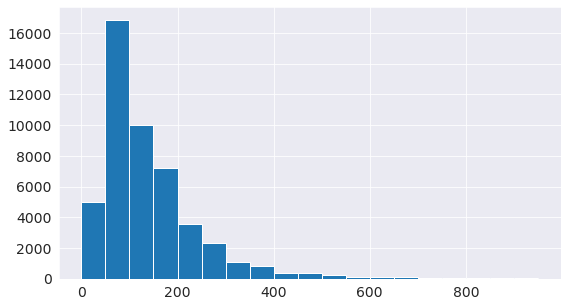

In [86]:
plt.hist(df.price, bins=np.arange(0, 1000, 50));

**TODO** - Compare the average price of an airbnb in New York by each neighbourhood group. 

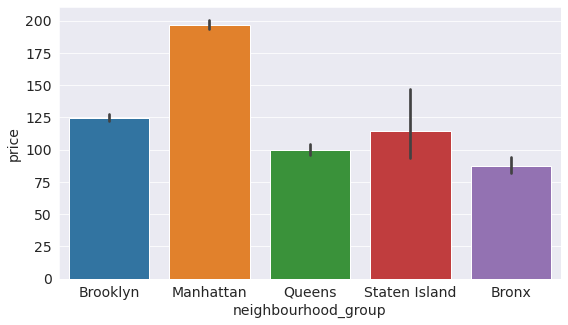

In [22]:
sns.barplot(x='neighbourhood_group', y='price', data=df);

It looks like, as one may have guessed, Manhattan exceeds the other boroughs in price. Interestingly, Staten Island has a large distribution for the 95% CI. That means there must be a lot of variety in the cost of airbnbs in Staten Island. 

**TODO** - Let's look further into the distribution of the price of airbnbs in Staten Island.

In [23]:
staten_df = df[df.neighbourhood_group == "Staten Island"]
staten_df['price'].describe()

count     373.000000
mean      114.812332
std       277.620403
min        13.000000
25%        50.000000
50%        75.000000
75%       110.000000
max      5000.000000
Name: price, dtype: float64

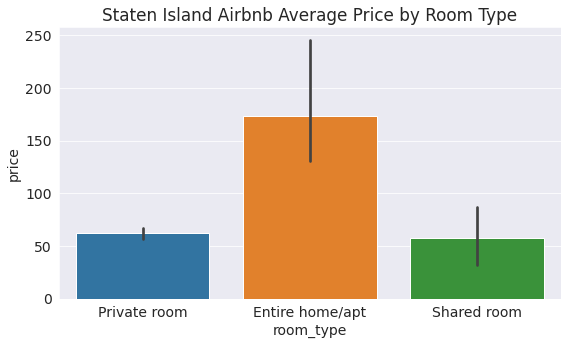

In [24]:
sns.barplot(x='room_type', y='price', data=staten_df).set_title('Staten Island Airbnb Average Price by Room Type');

**TODO** - Let's look into the minimum nights required for a stay based on room type. 

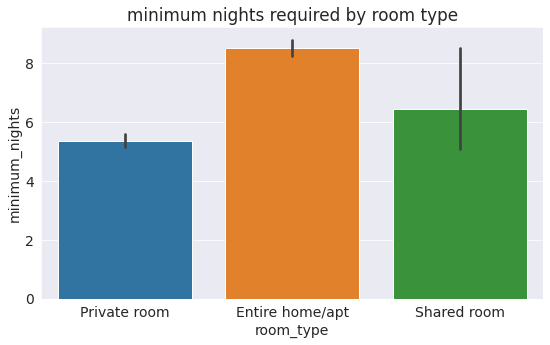

In [25]:
sns.barplot(x='room_type', y='minimum_nights', data=df).set_title('minimum nights required by room type');

The minimum nights required seems higher than I would expect. Let's look further into this. 

In [26]:
df.minimum_nights.describe()

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [27]:
df.sort_values('minimum_nights', ascending=False).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaT,NaN,1,362
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaT,NaN,1,365
47620,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaT,NaN,1,331
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaT,NaN,1,358
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaT,NaN,1,362
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90


While it does seem odd that multiple listings require at least 500 nights in order to stay at the airbnb, perhaps these listings are longterm rentals. 

**TODO** - Let's see if there is any connection between number of reviews and price. 

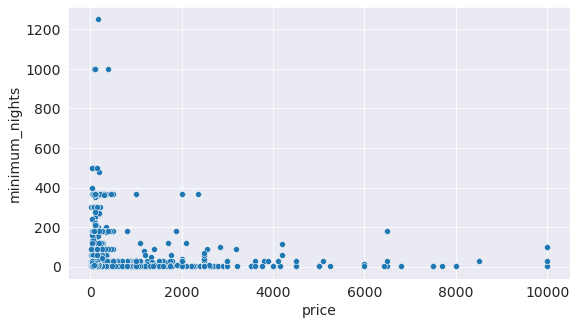

In [28]:
sns.scatterplot(x=df.price, y=df.minimum_nights);

It is safe to say that as the price increases for an airbnb, the minimum nights required decreases. This makes sense intuitively. 

**TODO** - Lastly, let's compare the number of listings in each neighborhood in Manhattan. 

In [29]:
manhattan_df = df[df.neighbourhood_group == "Manhattan"]
manhattan_count_df=manhattan_df.groupby("neighbourhood").count()
manhattan_count_df.sort_values('id', ascending=False)['id']

neighbourhood
Harlem                 2658
Upper West Side        1971
Hell's Kitchen         1958
East Village           1853
Upper East Side        1798
Midtown                1545
East Harlem            1117
Chelsea                1113
Lower East Side         911
Washington Heights      899
West Village            768
Financial District      744
Murray Hill             484
Kips Bay                470
Greenwich Village       392
Chinatown               368
SoHo                    358
Morningside Heights     346
Gramercy                338
Theater District        288
Nolita                  253
Inwood                  252
Tribeca                 177
Little Italy            121
Flatiron District        80
NoHo                     78
Roosevelt Island         77
Two Bridges              72
Battery Park City        70
Civic Center             52
Stuyvesant Town          37
Marble Hill              12
Name: id, dtype: int64

There appears to be such a range of the amount of listings in each neighbourhood. Maybe this is due to a wide variety in population/housing units per neighbourhood. It would be interesting to compare the number of listings in each neighbourhood with the population/housing units per neighbourhood. 

Let us save and upload our work to Jovian before continuing

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sgallivan19/airbnb-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sgallivan19/airbnb-course-project


'https://jovian.ai/sgallivan19/airbnb-course-project'

## Asking and Answering Questions

TODO - We will now ask and answer a few interesting questions about the NYC airbnb data.



#### Q1: TODO - What is the most expensive neighbourhood for an airbnb in Manhattan?

Let's define 'most expensive' as the most expensive median airbnb rental. 

In [37]:
manhattan_df['neighbourhood'].unique()

array(['Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'West Village',
       'Chelsea', 'Inwood', 'East Village', 'Lower East Side', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Washington Heights',
       'Financial District', 'Morningside Heights', 'NoHo',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'Two Bridges', 'Nolita', 'Gramercy',
       'Theater District', 'Tribeca', 'Battery Park City', 'Civic Center',
       'Stuyvesant Town', 'Marble Hill'], dtype=object)

In [81]:
mgroup = manhattan_df.groupby(['neighbourhood'])['price'].median()
mgroup.sort_values(ascending = False)

neighbourhood
Tribeca                295.0
NoHo                   250.0
Flatiron District      225.0
Midtown                210.0
West Village           200.0
Financial District     200.0
SoHo                   199.0
Chelsea                199.0
Greenwich Village      197.5
Battery Park City      195.0
Theater District       190.0
Murray Hill            190.0
Nolita                 179.0
Civic Center           169.0
Hell's Kitchen         168.0
Gramercy               165.0
Kips Bay               152.0
Upper West Side        150.0
Little Italy           150.0
East Village           150.0
Upper East Side        149.0
Lower East Side        139.0
Chinatown              129.0
Stuyvesant Town        115.0
Two Bridges            109.5
East Harlem             99.0
Morningside Heights     98.5
Harlem                  89.0
Roosevelt Island        80.0
Inwood                  77.5
Marble Hill             76.5
Washington Heights      72.0
Name: price, dtype: float64

The most expensive neighborhood in Manhattan is Tribeca, with a median airbnb price of $295.

#### Q2: TODO - Which room types have the most and least availability?

We will use box and whisker plots to visualize the distribution of rental availability according to each room type.

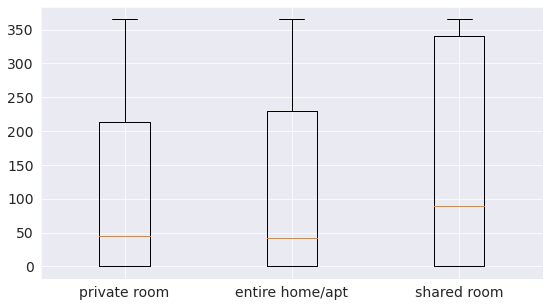

In [47]:
private_df = df[df.room_type == "Private room"]
entire_df = df[df.room_type == "Entire home/apt"]
shared_df = df[df.room_type == "Shared room"]
data = [private_df.availability_365, entire_df.availability_365, shared_df.availability_365]
plt.boxplot(data)
plt.xticks([1,2,3], ['private room', 'entire home/apt',
                    'shared room']);

From these boxplots we can say that shared rooms have the most availability while entire homes have the least availability. 

#### Q3: TODO - What is the most expensive shared room in Manhattan?

In [48]:
manhattan_shared_df=manhattan_df[manhattan_df.room_type == "Shared room"]
manhattan_shared_df.sort_values("price", ascending=False).head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3700,2230982,An Accomodating Apartment on Wall,11385753,Greg,Manhattan,Financial District,40.70511,-74.00943,Shared room,1000,1,0,NaT,NaN,1,0


The most expensive shared room in Manhattan is a whopping $1000.

#### Q4: TODO - What is the average minimum nights required to stay in an Airbnb?

In [49]:
df["minimum_nights"].describe()

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

The average minimum nights required to stay in an Airbnb is 7 nights.

#### Q5: TODO - What is the least expensive airbnb in Brooklyn and where is it located?

In [51]:
brooklyn_df = df[df.neighbourhood_group == "Brooklyn"]

In [80]:
bgroup = brooklyn_df.groupby("neighbourhood")["price"].median() 

bgroup.sort_values(ascending=True)

neighbourhood
Borough Park                  53.5
Brownsville                   62.0
Sheepshead Bay                65.0
Bushwick                      65.0
Cypress Hills                 68.0
Bath Beach                    69.0
Kensington                    70.0
Gravesend                     70.0
Flatbush                      72.0
Midwood                       75.0
East Flatbush                 75.0
East New York                 75.0
Bensonhurst                   75.0
Bedford-Stuyvesant            80.0
Sunset Park                   80.0
Prospect-Lefferts Gardens     80.0
Dyker Heights                 82.5
Flatlands                     85.0
Brighton Beach                85.0
Canarsie                      85.0
Crown Heights                 85.0
Bay Ridge                     85.0
Fort Hamilton                 90.0
Bergen Beach                  96.0
Coney Island                 100.0
Williamsburg                 105.0
Manhattan Beach              112.0
Red Hook                     117.0
Greenp

The least expensive airbnb rental in Brooklyn is $53.5 per night in the Borough Park neighbourhood.

Let us save and upload our work to Jovian before continuing.

In [82]:
import jovian

In [87]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sgallivan19/airbnb-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sgallivan19/airbnb-course-project


'https://jovian.ai/sgallivan19/airbnb-course-project'

## Inferences and Conclusion

**TODO** - write a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

The New York City airbnb data is a fascinating dataset. The price per night varies greatly across the city depending on the neighbourhood and room type. Aditionally, the range of prices within each borough greatly vary. It seems that there is an airbnb rental suitable for everyone: a private penthouse apartment in Tribeca for hundreds of dollars per night to a shared room in Staten Island for much less.  

In [90]:
import jovian

In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sgallivan19/airbnb-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sgallivan19/airbnb-course-project


'https://jovian.ai/sgallivan19/airbnb-course-project'

## References and Future Work

**TODO** - In the future I would like to return to this dataset and utilize the geographical coordinate data. Mapping the data onto a map of New York City would provide an incredible visual interpretation and understanding. I would like to thank the blog posts of "Towards Data Science" for providing helpful tips and tricks for manipulating data using python. Here is a link to their website: https://towardsdatascience.com/

In [93]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>